In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report)

In [6]:
#  Load the uploaded CSV file
df=pd.read_csv("C:/Crop_data.csv")

In [7]:
df

,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,Sandy soil,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Amaranthus
1,Andaman and Nicobar,Sandy soil,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Green Banana
2,Andaman and Nicobar,Sandy soil,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Ladies Finger
3,Andaman and Nicobar,Sandy soil,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Black pepper
...,...,...,...,...,...,...,...,...,...,...,...
2195,West Bengal,Alluvial soil,107,34,32,26.774637,66.413269,6.780064,177.774507,1000,Onion
2196,West Bengal,Alluvial soil,99,15,27,27.417112,56.636362,6.086922,127.924610,800,Papaya
2197,West Bengal,Alluvial soil,118,33,30,24.131797,67.225123,6.362608,173.322839,560,Potato
2198,West Bengal,Alluvial soil,117,32,34,26.272418,52.127394,6.758793,127.175293,1500,Pumpkin


In [8]:
#dropping CROP PRICE
df1=df.drop('CROP_PRICE',axis=1)
df1

,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP
0,Andaman and Nicobar,Sandy soil,90,42,43,20.879744,82.002744,6.502985,202.935536,Amaranthus
1,Andaman and Nicobar,Sandy soil,85,58,41,21.770462,80.319644,7.038096,226.655537,Green Banana
2,Andaman and Nicobar,Sandy soil,60,55,44,23.004459,82.320763,7.840207,263.964248,Ladies Finger
3,Andaman and Nicobar,Sandy soil,74,35,40,26.491096,80.158363,6.980401,242.864034,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,78,42,42,20.130175,81.604873,7.628473,262.717340,Black pepper
...,...,...,...,...,...,...,...,...,...,...
2195,West Bengal,Alluvial soil,107,34,32,26.774637,66.413269,6.780064,177.774507,Onion
2196,West Bengal,Alluvial soil,99,15,27,27.417112,56.636362,6.086922,127.924610,Papaya
2197,West Bengal,Alluvial soil,118,33,30,24.131797,67.225123,6.362608,173.322839,Potato
2198,West Bengal,Alluvial soil,117,32,34,26.272418,52.127394,6.758793,127.175293,Pumpkin


In [9]:
#checking for 0
df.isnull().sum()

STATE          0
SOIL_TYPE      0
N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
CROP_PRICE     0
CROP           0
dtype: int64

In [10]:
#printing state column values
df['STATE'].value_counts()

STATE
Uttar Pradesh          574
Kerala                 274
Tamil Nadu             183
Punjab                 180
Maharashtra            162
West Bengal            124
Gujarat                113
Himachal Pradesh       102
Odisha                  86
Haryana                 65
Assam                   58
Manipur                 52
Madhya Pradesh          44
Rajasthan               41
Karnataka               36
Uttrakhand              21
Tripura                 18
Andaman and Nicobar     15
Telangana               15
Pondicherry              7
Andhra Pradesh           7
Meghalaya                6
Nagaland                 6
Chattisgarh              5
Jammu and Kashmir        3
Goa                      3
Name: count, dtype: int64

In [11]:
# Import libraries
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
#printing state values
df['state']=le.fit_transform(df['STATE'])

In [13]:
df['state'].value_counts()

state
23    574
10    274
20    183
18    180
12    162
25    124
5     113
7     102
16     86
6      65
2      58
13     52
11     44
19     41
9      36
24     21
22     18
0      15
21     15
17      7
1       7
14      6
15      6
3       5
8       3
4       3
Name: count, dtype: int64

In [14]:
df['state'].value_counts()

state
23    574
10    274
20    183
18    180
12    162
25    124
5     113
7     102
16     86
6      65
2      58
13     52
11     44
19     41
9      36
24     21
22     18
0      15
21     15
17      7
1       7
14      6
15      6
3       5
8       3
4       3
Name: count, dtype: int64

In [15]:
#printing soil type values
df['soil_type']=le.fit_transform(df['SOIL_TYPE'])

In [16]:
df['SOIL_TYPE'].value_counts()

SOIL_TYPE
Alluvial soil      742
Sandy Clay loam    274
Desert soil        245
Laterite soil      244
Regur soil         162
Red soil           144
Desert soils       113
Sandy loam         102
Inceptisols         58
Black soil          44
Sandy soil          33
Mountain soil.      21
Delta alluvium       7
Loamy soil           6
Clayey soils         5
Name: count, dtype: int64

In [17]:
df['soil_type'].value_counts()

soil_type
0     742
12    274
4     245
7     244
11    162
10    144
5     113
13    102
6      58
1      44
14     33
9      21
3       7
8       6
2       5
Name: count, dtype: int64

In [18]:
#droping of perticular columns
df1=df.drop(['SOIL_TYPE','STATE','CROP_PRICE'],axis=1)

In [19]:
df1

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP,state,soil_type
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Amaranthus,0,14
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Green Banana,0,14
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Ladies Finger,0,14
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Bitter Gourd,0,14
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Black pepper,0,14
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Onion,25,0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Papaya,25,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Potato,25,0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Pumpkin,25,0


In [20]:
import seaborn as sns

In [21]:
df2=df1[['ph','RAINFALL','HUMIDITY','TEMPERATURE','N_SOIL','P_SOIL','K_SOIL']]

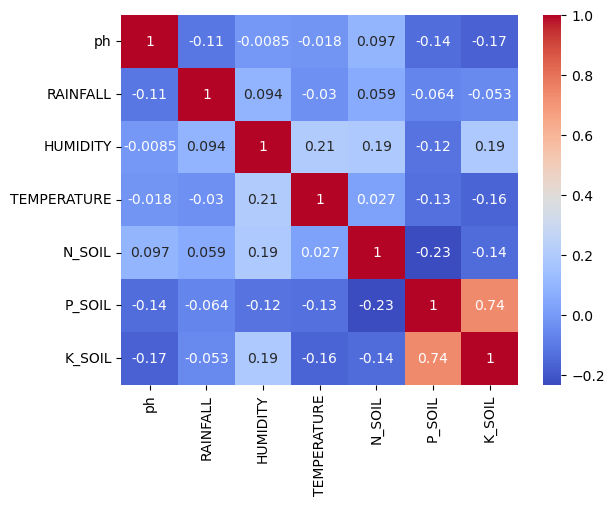

In [22]:
#ploting correlation heatmap 
corr_matrix = df2.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

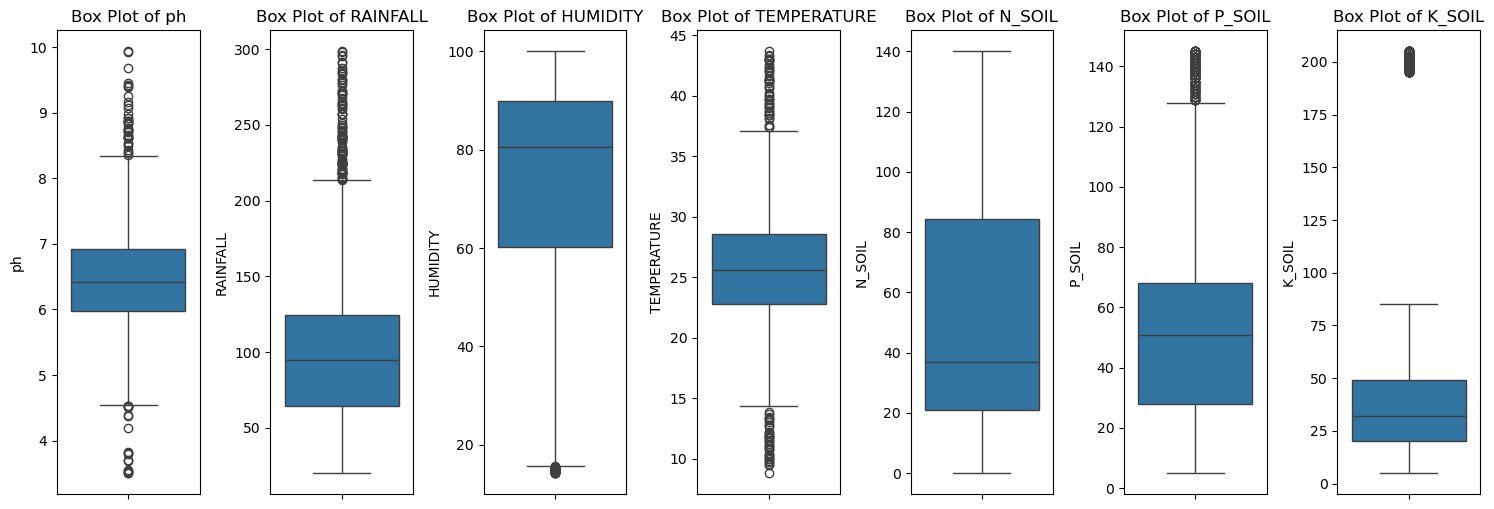

In [23]:
#box plot foe all columns
fig, axes = plt.subplots(nrows=1, ncols=len(df2.columns), figsize=(15, 5))

for i, column in enumerate(df2.columns):
    sns.boxplot(data=df2[column], ax=axes[i], orient='v')
plt.tight_layout()

for i, column in enumerate(df2.columns):
    axes[i].set_title(f'Box Plot of {column}')

plt.show()

In [24]:
#calculating outliers for each column in the dataframe df2
for column in df2.columns:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df2[(df2[column] < Q1 - 1.5 * IQR) | (df2[column] > Q3 + 1.5 * IQR)]
    print(f"{column}: {len(outliers)} outliers")

ph: 57 outliers
RAINFALL: 100 outliers
HUMIDITY: 30 outliers
TEMPERATURE: 86 outliers
N_SOIL: 0 outliers
P_SOIL: 138 outliers
K_SOIL: 200 outliers


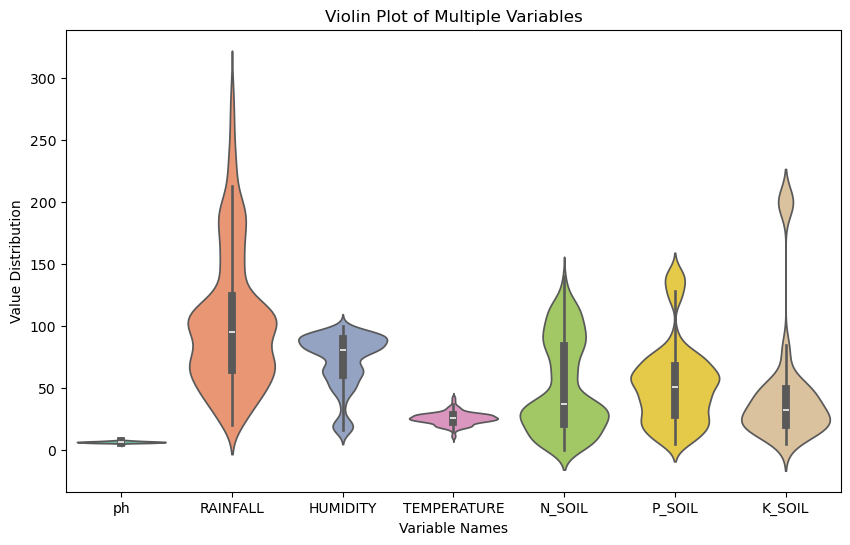

In [25]:
#calculating outliers for each column in the dataframe df2. 

plt.figure(figsize=(10, 6))  
sns.violinplot(data=df2, orient='v', palette='Set2')  

plt.xlabel('Variable Names')
plt.ylabel('Value Distribution')
plt.title('Violin Plot of Multiple Variables')
plt.show()

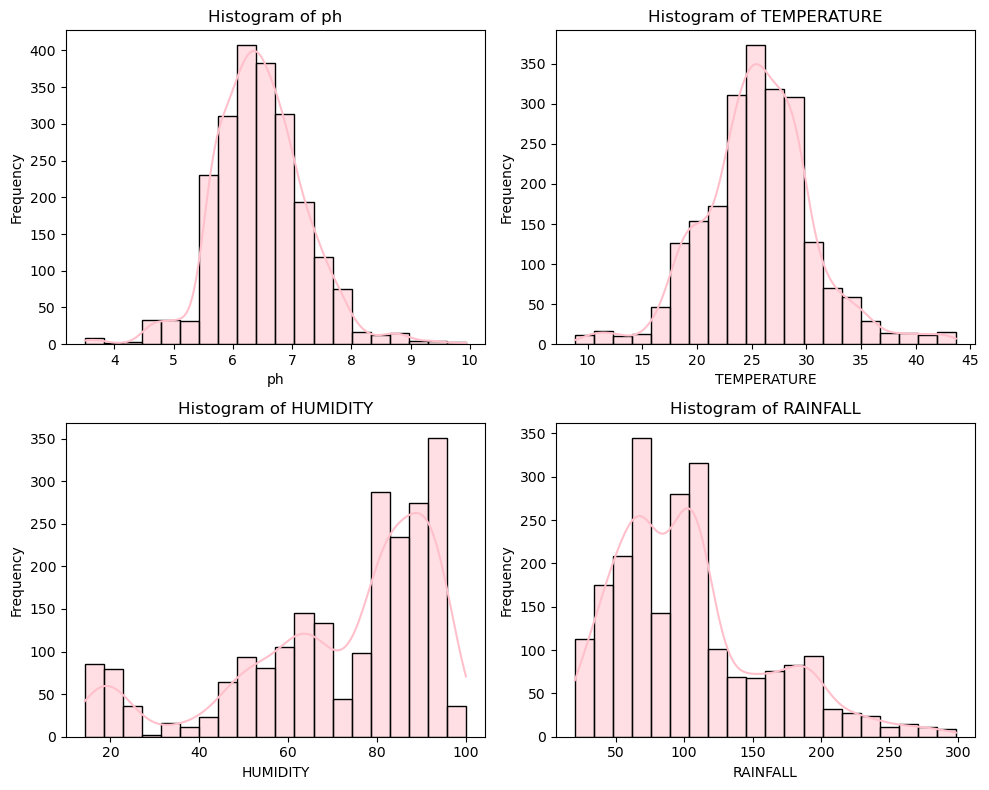

In [41]:
#histogram for ph, humidity,temparature,rainfall
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  

axes = axes.flatten()
variables_to_plot = ['ph', 'TEMPERATURE', 'HUMIDITY', 'RAINFALL']

for i, variable in enumerate(variables_to_plot):
    ax = axes[i]
    sns.histplot(data=df2, x=variable, bins=20, kde=True, color='pink', ax=ax)
    ax.set_title(f'Histogram of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [26]:
x=df1.drop(['CROP'],axis=1)

In [27]:
x

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,state,soil_type
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,14
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,14
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,14
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,14
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,14
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,25,0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,25,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,25,0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,25,0


In [28]:
y=df1[['CROP']]

In [29]:
#importing libraries
from sklearn.model_selection import train_test_split

In [30]:
# Split into train/test (last 12 months test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=10,            # Maximum depth of each tree
    min_samples_split=2,     # Minimum samples required to split an internal node
    min_samples_leaf=1,      # Minimum samples required to be at a leaf node
    random_state=42,         # Ensures reproducibility
)


In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
rand.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [34]:
rand.score(x_train,y_train)

0.8920454545454546

In [35]:
rand.score(x_test,y_test)

0.05454545454545454

In [38]:
rand.predict([[85,40,25,24,80,7,250,9,10]])

array(['Tomato'], dtype=object)

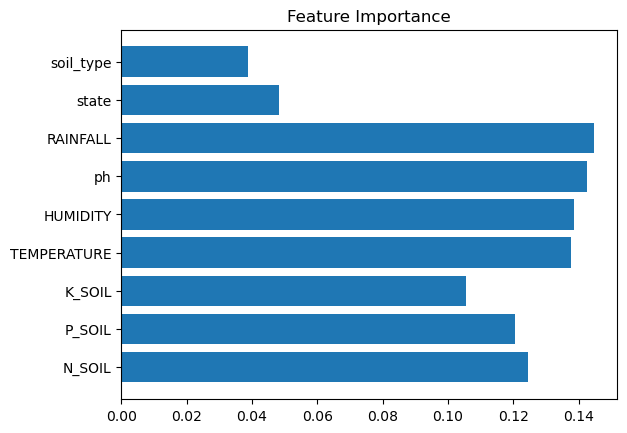

In [39]:
import matplotlib.pyplot as plt

importances = rand.feature_importances_
features = x_train.columns
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search setup
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

# Prediction using the best estimator
y_pred = grid.best_estimator_.predict(x_test)

# Evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score: 0.08238636363636365
Test Accuracy: 0.05909090909090909

Classification Report:
                  precision    recall  f1-score   support

     Amaranthus       0.00      0.00      0.00         3
           Amla       0.00      0.00      0.00         1
          Apple       0.00      0.00      0.00         2
       Arecanut       0.00      0.00      0.00         2
      Ash Gourd       0.00      0.00      0.00         0
          Bajra       0.00      0.00      0.00         1
         Banana       0.21      0.32      0.25        22
         Barley       0.00      0.00      0.00         2
          Beans       0.00      0.00      0.00         1
       Beetroot       0.00      0.00      0.00         1
    Bengal Gram       0.00      0.00      0.00         3
   Bitter Gourd       0.00      0.00      0.00         

In [44]:
from sklearn import tree
model=tree.DecisionTreeClassifier() 

In [45]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
model.score(x_train,y_train)

1.0

In [48]:
model.predict([[85,40,25,24,80,7,250,9,10]])

array(['Paddy'], dtype=object)

In [49]:
model.score(x_test,y_test)

0.04318181818181818

In [50]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report)

In [64]:
df=pd.read_csv("C:/Crop_data.csv")

In [65]:
df

,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,Sandy soil,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Amaranthus
1,Andaman and Nicobar,Sandy soil,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Green Banana
2,Andaman and Nicobar,Sandy soil,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Ladies Finger
3,Andaman and Nicobar,Sandy soil,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Black pepper
...,...,...,...,...,...,...,...,...,...,...,...
2195,West Bengal,Alluvial soil,107,34,32,26.774637,66.413269,6.780064,177.774507,1000,Onion
2196,West Bengal,Alluvial soil,99,15,27,27.417112,56.636362,6.086922,127.924610,800,Papaya
2197,West Bengal,Alluvial soil,118,33,30,24.131797,67.225123,6.362608,173.322839,560,Potato
2198,West Bengal,Alluvial soil,117,32,34,26.272418,52.127394,6.758793,127.175293,1500,Pumpkin


In [66]:
import pandas as pd

# Loading dataset
df = pd.read_csv("C:/crop_data.csv")

# Target column
target_column = "CROP"

# Spliting into features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (2200, 10)
Target (y) shape: (2200,)


In [67]:
print(X)

                    STATE      SOIL_TYPE  N_SOIL  P_SOIL  K_SOIL  TEMPERATURE  \
0     Andaman and Nicobar     Sandy soil      90      42      43    20.879744   
1     Andaman and Nicobar     Sandy soil      85      58      41    21.770462   
2     Andaman and Nicobar     Sandy soil      60      55      44    23.004459   
3     Andaman and Nicobar     Sandy soil      74      35      40    26.491096   
4     Andaman and Nicobar     Sandy soil      78      42      42    20.130175   
...                   ...            ...     ...     ...     ...          ...   
2195          West Bengal  Alluvial soil     107      34      32    26.774637   
2196          West Bengal  Alluvial soil      99      15      27    27.417112   
2197          West Bengal  Alluvial soil     118      33      30    24.131797   
2198          West Bengal  Alluvial soil     117      32      34    26.272418   
2199          West Bengal  Alluvial soil     104      18      30    23.603016   

       HUMIDITY        ph  

In [68]:
print(y)

0          Amaranthus
1        Green Banana
2       Ladies Finger
3        Bitter Gourd
4        Black pepper
            ...      
2195            Onion
2196           Papaya
2197           Potato
2198          Pumpkin
2199           Tomato
Name: CROP, Length: 2200, dtype: object


In [75]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])



In [76]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


Decision Tree Results
                     precision    recall  f1-score   support

Andaman and Nicobar       1.00      1.00      1.00         5
     Andhra Pradesh       1.00      1.00      1.00         2
              Assam       1.00      0.94      0.97        17
        Chattisgarh       1.00      1.00      1.00         1
                Goa       0.50      1.00      0.67         1
            Gujarat       1.00      1.00      1.00        34
            Haryana       1.00      1.00      1.00        20
   Himachal Pradesh       1.00      1.00      1.00        31
  Jammu and Kashmir       1.00      1.00      1.00         1
          Karnataka       1.00      1.00      1.00        11
             Kerala       1.00      1.00      1.00        82
     Madhya Pradesh       1.00      1.00      1.00        13
        Maharashtra       1.00      1.00      1.00        49
            Manipur       0.88      0.94      0.91        16
          Meghalaya       1.00      1.00      1.00         2


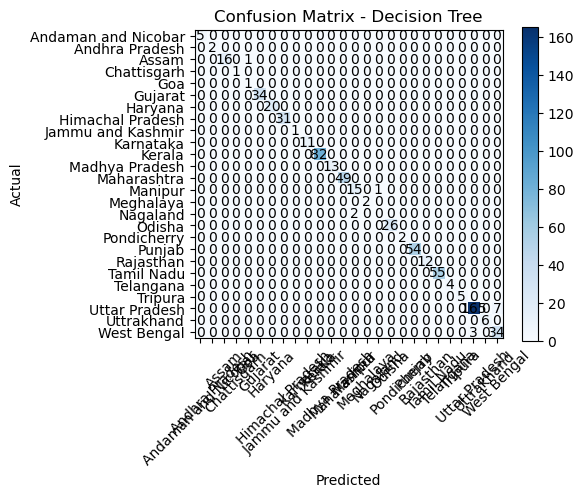


SVM Results
                     precision    recall  f1-score   support

Andaman and Nicobar       0.00      0.00      0.00         5
     Andhra Pradesh       0.00      0.00      0.00         2
              Assam       0.00      0.00      0.00        17
        Chattisgarh       0.00      0.00      0.00         1
                Goa       0.00      0.00      0.00         1
            Gujarat       0.00      0.00      0.00        34
            Haryana       0.00      0.00      0.00        20
   Himachal Pradesh       0.00      0.00      0.00        31
  Jammu and Kashmir       0.00      0.00      0.00         1
          Karnataka       0.00      0.00      0.00        11
             Kerala       0.21      0.55      0.31        82
     Madhya Pradesh       0.00      0.00      0.00        13
        Maharashtra       0.00      0.00      0.00        49
            Manipur       0.50      0.06      0.11        16
          Meghalaya       0.00      0.00      0.00         2
          

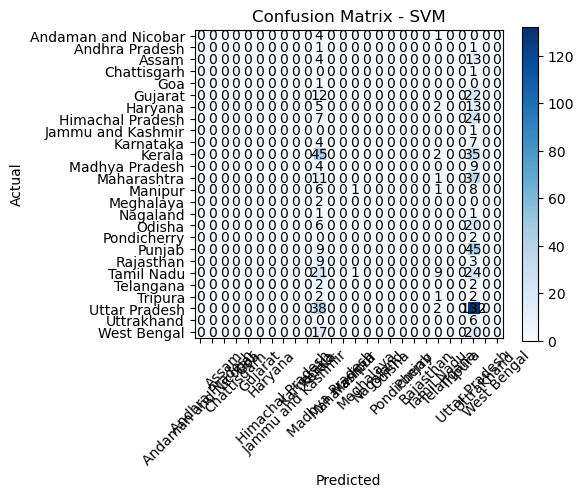


KNN Results
                     precision    recall  f1-score   support

Andaman and Nicobar       0.25      0.20      0.22         5
     Andhra Pradesh       0.00      0.00      0.00         2
              Assam       0.58      0.41      0.48        17
        Chattisgarh       0.25      1.00      0.40         1
                Goa       0.00      0.00      0.00         1
            Gujarat       0.26      0.32      0.29        34
            Haryana       0.65      0.55      0.59        20
   Himachal Pradesh       0.42      0.42      0.42        31
  Jammu and Kashmir       0.00      0.00      0.00         1
          Karnataka       0.14      0.18      0.16        11
             Kerala       0.50      0.74      0.60        82
     Madhya Pradesh       0.00      0.00      0.00        13
        Maharashtra       0.57      0.63      0.60        49
            Manipur       0.39      0.44      0.41        16
          Meghalaya       0.00      0.00      0.00         2
          

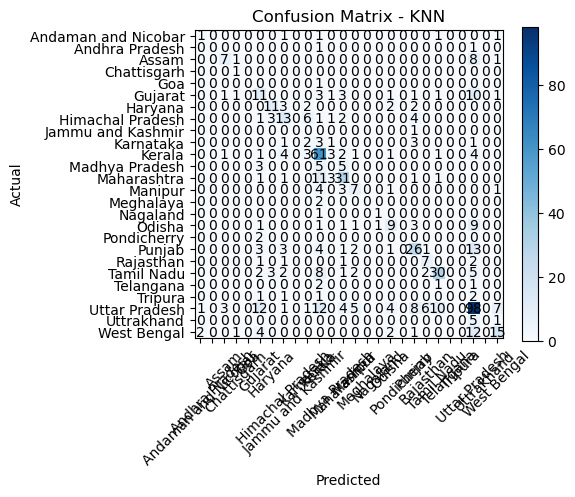


Logistic Regression Results
                     precision    recall  f1-score   support

Andaman and Nicobar       0.50      0.20      0.29         5
     Andhra Pradesh       0.00      0.00      0.00         2
              Assam       0.53      0.59      0.56        17
        Chattisgarh       0.00      0.00      0.00         1
                Goa       0.00      0.00      0.00         1
            Gujarat       0.57      0.47      0.52        34
            Haryana       0.70      0.80      0.74        20
   Himachal Pradesh       0.68      0.74      0.71        31
  Jammu and Kashmir       0.00      0.00      0.00         1
          Karnataka       0.40      0.18      0.25        11
             Kerala       0.77      0.85      0.81        82
     Madhya Pradesh       0.40      0.15      0.22        13
        Maharashtra       0.75      0.80      0.77        49
            Manipur       0.33      0.19      0.24        16
          Meghalaya       0.00      0.00      0.00     

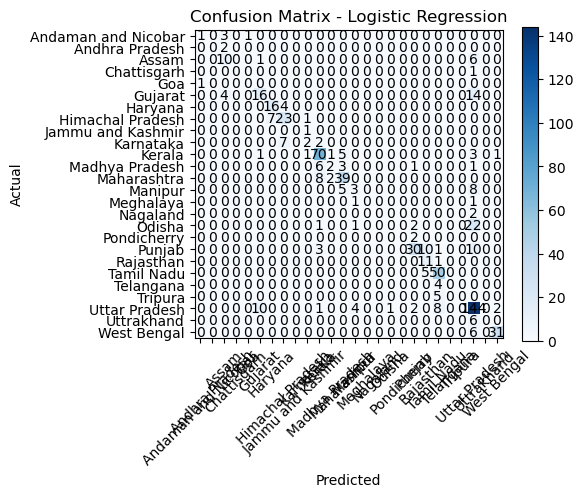


Random Forest Results
                     precision    recall  f1-score   support

Andaman and Nicobar       1.00      1.00      1.00         5
     Andhra Pradesh       1.00      1.00      1.00         2
              Assam       0.94      1.00      0.97        17
        Chattisgarh       1.00      1.00      1.00         1
                Goa       0.00      0.00      0.00         1
            Gujarat       1.00      1.00      1.00        34
            Haryana       1.00      1.00      1.00        20
   Himachal Pradesh       1.00      1.00      1.00        31
  Jammu and Kashmir       0.00      0.00      0.00         1
          Karnataka       1.00      1.00      1.00        11
             Kerala       1.00      1.00      1.00        82
     Madhya Pradesh       1.00      1.00      1.00        13
        Maharashtra       1.00      1.00      1.00        49
            Manipur       0.89      1.00      0.94        16
          Meghalaya       1.00      1.00      1.00         2


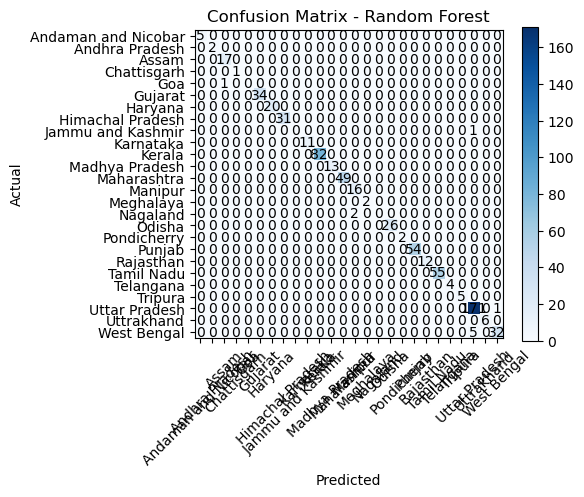


========== SUMMARY ==========
                 Model  Accuracy
0        Decision Tree  0.978788
1                  SVM  0.283333
2                  KNN  0.501515
3  Logistic Regression  0.678788
4        Random Forest  0.984848

Best Model = Random Forest


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ---------------------------
#  LOADING DATA
# ---------------------------
df = pd.read_csv("C:/Crop_data.csv")

target = "STATE"   # target column
X = df.drop(columns=[target])
y = df[target]

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical features (if any)
X = pd.get_dummies(X)

# ---------------------------
# TRAIN TEST SPLIT
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ---------------------------
#  MODELS
# ---------------------------
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = []

# ---------------------------
# TRAIN & EVALUATE MODELS
# ---------------------------
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results.append([name, acc])

    print("\n========================")
    print(f"{name} Results")
    print("========================")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix Plot
    plt.figure(figsize=(6,5))
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.colorbar()
    plt.xticks(range(len(le.classes_)), le.classes_, rotation=45)
    plt.yticks(range(len(le.classes_)), le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
    plt.tight_layout()
    plt.show()

# ---------------------------
#  BEST MODEL SELECTION
# ---------------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
best_model = results_df.iloc[results_df["Accuracy"].idxmax()]["Model"]

print("\n========== SUMMARY ==========")
print(results_df)
print("\nBest Model =", best_model)


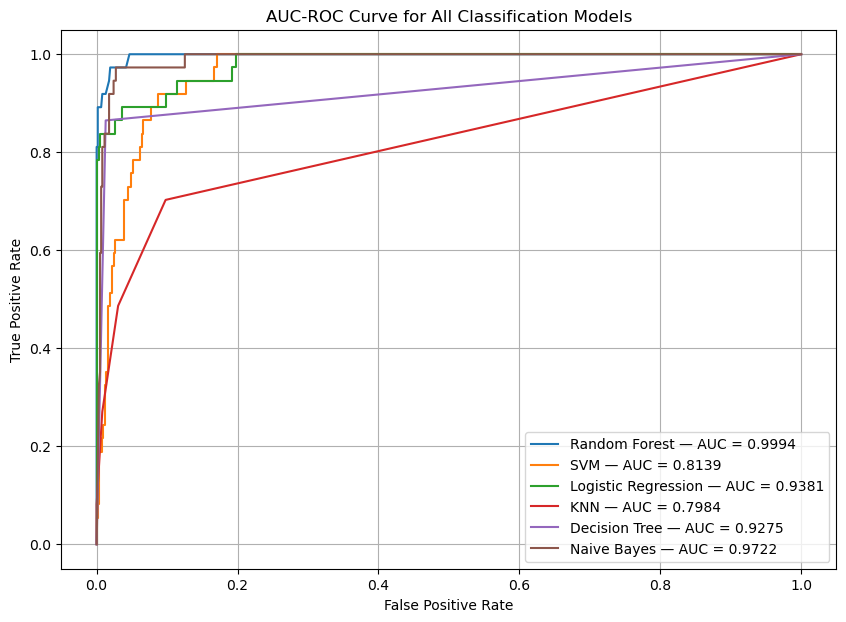

In [15]:
#IMPORTING LIBRARIES
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Import Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Dictionary of models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Binarize labels for multiclass ROC
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)

    auc_sum = 0
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
        auc_sum += auc(fpr, tpr)
    auc_score = auc_sum / n_classes  # average AUC for multiclass

    plt.plot(fpr, tpr, label=f"{name} — AUC = {auc_score:.4f}")

plt.title("AUC-ROC Curve for All Classification Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


Accuracy: 0.9863636363636363

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        31
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00        82
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        49
          13       0.89      1.00      0.94        16
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         2
          16       1.00    

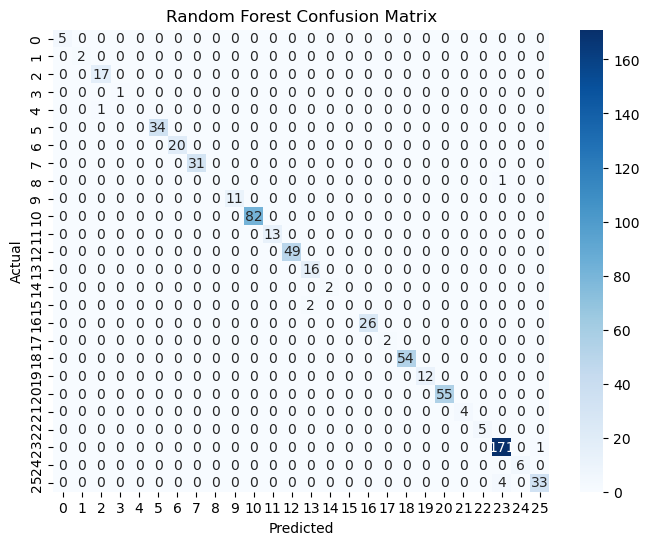

In [16]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
